##### 正規化(Normalization)

- コントラスト調整に用いられる
- 画像のmin, maxが0255だと意味ない

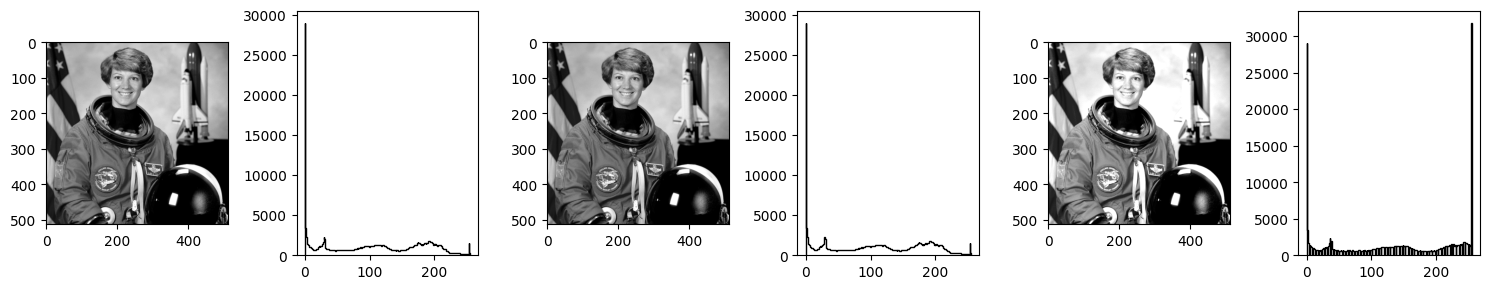

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data

fig, axes = plt.subplots(1, 6, figsize=(15, 3))
# 元画像
image = data.astronaut()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[1].hist(image.ravel(), bins=256, histtype='step', color='black')
# 画像のMIN, MAXで正規化した画像
normalized_image = (image.astype(np.float16) - np.min(image)) / (np.max(image) - np.min(image)) * 255
normalized_image = normalized_image.astype(np.uint8)
axes[2].imshow(normalized_image, cmap='gray', vmin=0, vmax=255)
axes[3].hist(normalized_image.ravel(), bins=256, histtype='step', color='black')
# 任意のMIN, MAXで正規化した画像
MIN, MAX = 0, 200
normalized_image = (image.astype(np.float16) - MIN) / (MAX - MIN) * 255
normalized_image = np.clip(normalized_image, 0, 255).astype(np.uint8)
axes[4].imshow(normalized_image, cmap='gray', vmin=0, vmax=255)
axes[5].hist(normalized_image.ravel(), bins=256, histtype='step', color='black')

plt.tight_layout()
plt.show()


##### 標準化(Standardization)

- 画像単体での標準化の意義はよくわからない

ORGIN: mean is 107.06486892700195, std is 75.42682820391185
STANDARDIZED: mean is 39.91019058227539, std is 29.41385737037838


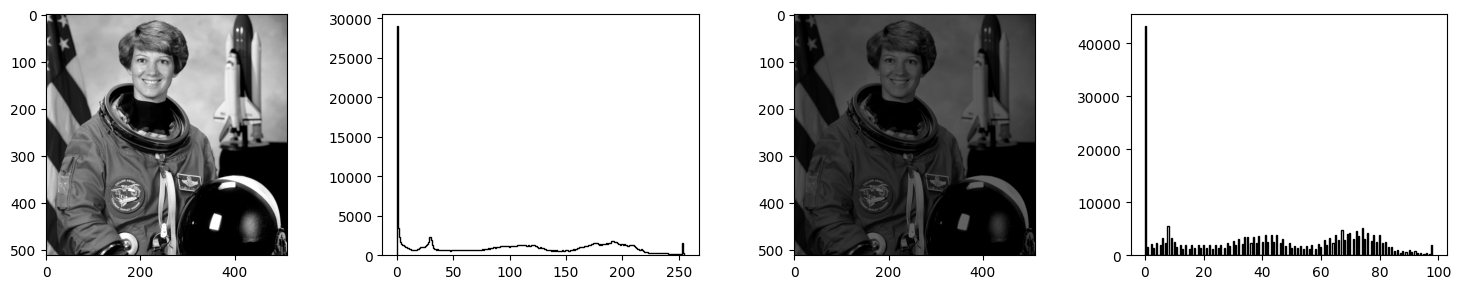

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
# 元画像
image = data.astronaut()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"ORGIN: mean is {image.mean()}, std is {image.std()}")
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[1].hist(image.ravel(), bins=256, histtype='step', color='black')
# 任意の平均, 標準偏差に標準化した画像
MEAN, STD = 40, 30
standardized_image = (image.astype(np.float16) - image.mean()) / image.std() * STD + MEAN
standardized_image = np.clip(standardized_image, 0, 255).astype(np.uint8)
cv2.imwrite("tmp.png", standardized_image)
print(f"STANDARDIZED: mean is {standardized_image.mean()}, std is {standardized_image.std()}")
axes[2].imshow(standardized_image, cmap='gray', vmin=0, vmax=255)
axes[3].hist(standardized_image.ravel(), bins=256, histtype='step', color='black')

plt.tight_layout()
plt.show()


##### データセット標準化

ORGIN: mean is 59.96412658691406, std is 72.7891525006661
dataset mean is 127.7191731968655, dataset std is 67.15728196258524
STANDARDIZED: mean is 126.32284545898438, std is 65.02169499203892


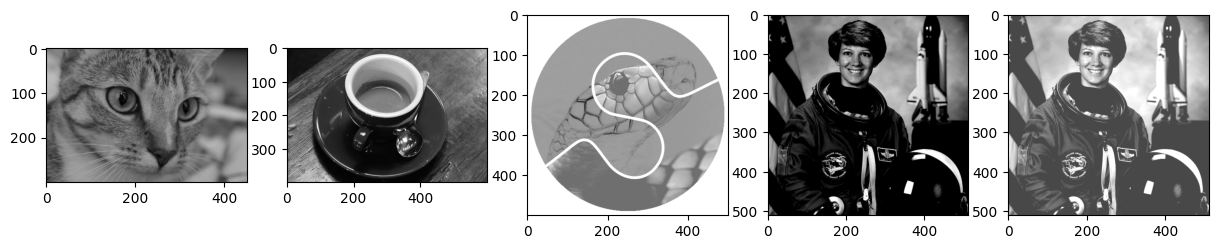

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data

def normalize(image, min, max):
    normalized_image = (image.astype(np.float16) - min) / (max - min) * 255
    normalized_image = np.clip(normalized_image, 0, 255).astype(np.uint8)
    return normalized_image

def standardize(image, mean, std):
    standardized_image = (image.astype(np.float16) - image.mean()) / image.std() * std + mean
    standardized_image = np.clip(standardized_image, 0, 255).astype(np.uint8)
    return standardized_image

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
# 元画像
image = data.astronaut()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = normalize(image, min=100, max=255)      # わざと暗めの画像を作る
print(f"ORGIN: mean is {image.mean()}, std is {image.std()}")
dataset = [data.chelsea(), data.coffee(), data.logo()]
dataset = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in dataset]
axes[0].imshow(dataset[0], cmap='gray', vmin=0, vmax=255)
axes[1].imshow(dataset[1], cmap='gray', vmin=0, vmax=255)
axes[2].imshow(dataset[2], cmap='gray', vmin=0, vmax=255)
axes[3].imshow(image, cmap='gray', vmin=0, vmax=255)
# データセット標準化後の画像
all_pixels = np.concatenate([image.ravel() for image in dataset])
dataset_mean = np.mean(all_pixels)
dataset_std = np.std(all_pixels)
print(f"dataset mean is {dataset_mean}, dataset std is {dataset_std}")
standardized_image = standardize(image, dataset_mean, dataset_std)
print(f"STANDARDIZED: mean is {standardized_image.mean()}, std is {standardized_image.std()}")
axes[4].imshow(standardized_image, cmap='gray', vmin=0, vmax=255)

##### オーギュメンテーション(Augumentation)

Repeat No.0: mean is 98.50942611694336, std is 67.18741332173464
Repeat No.1: mean is 110.37398147583008, std is 53.946673552779686
Repeat No.2: mean is 145.6113624572754, std is 71.20912119368238
Repeat No.3: mean is 121.88655090332031, std is 85.3333166197293
Repeat No.4: mean is 74.48490524291992, std is 49.353086075919876


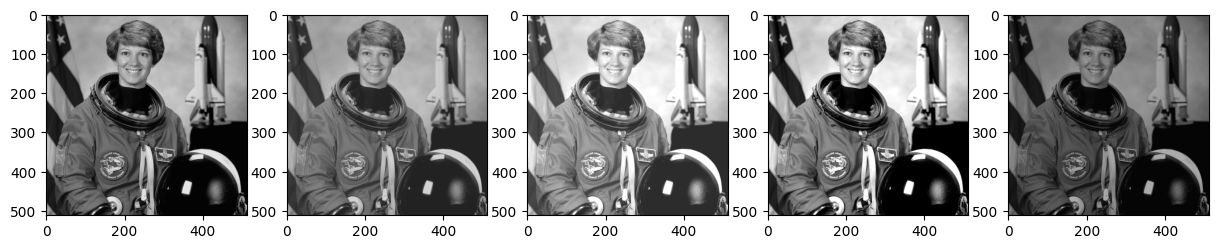

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from skimage import data

transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=(0.5, 1.0)),
])

image = data.astronaut()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = Image.fromarray(image)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    augmented_image = transform(image)
    axes[i].imshow(augmented_image, cmap='gray', vmin=0, vmax=255)
    augmented_image = np.array(augmented_image, dtype=np.uint8)
    print(f"Repeat No.{i}: mean is {augmented_image.mean()}, std is {augmented_image.std()}")